# AutoEncode
---
- 표현(특징) 학습
    * 데이터에서 주요 특징을 찾아 압축 후 복원하는 학습 모델
- 구성
    * 인코더(Encoder) : 입력 데이터에서 주요 특징 추출 / 압축
    * 디코더(Decoder) : 주요 특징에서 원 데이터로 복원

In [1]:
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import set_random_seed, plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

## [1] 데이터 준비 및 로딩
---

In [2]:
(x_train, y_train), (x_test, y_test)=load_data()

In [3]:
print(f'x_train.shape : {x_train.shape}, x_test.shape: {x_test.shape}')

x_train.shape : (60000, 28, 28), x_test.shape: (10000, 28, 28)


## [2] 데이터 전처리

In [4]:
x_train=x_train.reshape(-1, 28*28)/255.0

In [5]:
x_test=x_test.reshape(-1, 28*28)/255.0

In [6]:
print('x_train.shape: ', x_train.shape)
print('x_test.shape: ', x_test.shape)

x_train.shape:  (60000, 784)
x_test.shape:  (10000, 784)


In [7]:
x_train, x_test, y_train, y_test=train_test_split(x_train, y_train,
                                                  random_state=12,
                                                  stratify=y_train)

In [8]:
print(f'x_train.shape : {x_train.shape}, y_train.shape : {y_train.shape}')
print(f'x_test.shape : {x_test.shape}, y_test.shape : {y_test.shape}')

x_train.shape : (45000, 784), y_train.shape : (45000,)
x_test.shape : (15000, 784), y_test.shape : (15000,)


In [9]:
# 검증용 데이터 셋 준비
x_train, x_val, y_train, y_val=train_test_split(x_train, y_train,
                                                random_state=12,
                                                stratify=y_train)

In [10]:
x_val=x_val.reshape(-1, 28*28)/255.0

In [11]:
print(f'x_train.shape : {x_train.shape}, x_val.shape : {x_val.shape}')
print(f'y_train.shape : {y_train.shape}, y_val.shape : {y_val.shape}')

x_train.shape : (33750, 784), x_val.shape : (11250, 784)
y_train.shape : (33750,), y_val.shape : (11250,)


##  [3]모델 구성 및 생성

In [12]:
def createAEModel (n_node):
    model=Sequential()
    # 입력
    model.add(Dense(units=n_node, activation='relu', input_shape=(784,)))
    # 출력
    model.add(Dense(784, activation='sigmoid'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [13]:
# oneModel=createAEModel(1)
# twoModel=createAEModel(2)
# fourModel=createAEModel(4)
# twentyModel=createAEModel(20)
oneHundredModel=createAEModel(100)

In [14]:
# oneModel.summary() #, twoModel.summary(),
oneHundredModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 784)               79184     
                                                                 
Total params: 157,684
Trainable params: 157,684
Non-trainable params: 0
_________________________________________________________________


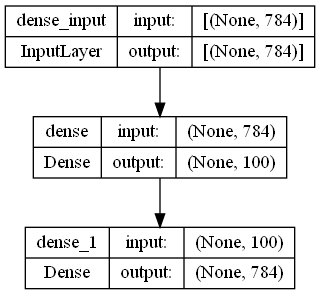

In [15]:
plot_model(oneHundredModel, show_shapes=True)

## [4] 모델 학습

In [16]:
# x, y 값 모두 입력 데이터
oneHundredModel.fit(x_train, x_train, epochs=10)

Epoch 1/10
1055/1055 [==============================] - 2s 2ms/step - loss: 0.0271
Epoch 2/10
1055/1055 [==============================] - 2s 2ms/step - loss: 0.0080
Epoch 3/10
1055/1055 [==============================] - 2s 2ms/step - loss: 0.0049
Epoch 4/10
1055/1055 [==============================] - 2s 2ms/step - loss: 0.0038
Epoch 5/10
1055/1055 [==============================] - 2s 2ms/step - loss: 0.0033
Epoch 6/10
1055/1055 [==============================] - 2s 2ms/step - loss: 0.0030
Epoch 7/10
1055/1055 [==============================] - 2s 2ms/step - loss: 0.0028
Epoch 8/10
1055/1055 [==============================] - 2s 2ms/step - loss: 0.0026
Epoch 9/10
1055/1055 [==============================] - 2s 2ms/step - loss: 0.0025
Epoch 10/10
1055/1055 [==============================] - 2s 2ms/step - loss: 0.0025


In [17]:
oneHundredModel.evaluate(x_test, x_test)

469/469 [==============================] - 1s 1ms/step - loss: 0.0025


0.0025130484718829393

## [5] 예측
---
- 새로운 데이터 사용

In [18]:
pre_out=oneHundredModel.predict(x_test[0].reshape(-1, 784))

1/1 [==============================] - 0s 62ms/step


In [19]:
pre_out.shape

(1, 784)

### 원본 이미지 -AE 진행된 이미지

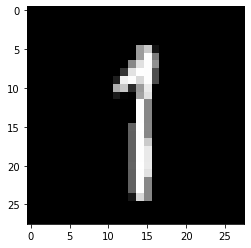

In [20]:
plt.imshow(x_test[0].reshape(28,28), cmap='gray')
plt.show()

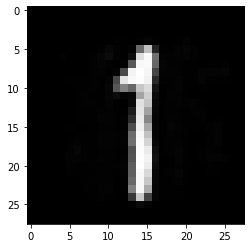

In [21]:
plt.imshow(pre_out.reshape(28,28), cmap='gray')
plt.show()